
# Understanding calibration curves

In this notebook, we explore calibration curves. We use different set of predictions
leading to different calibration curves from which we want to build insights and
understand the impact and meaning when it comes to our predictive models.

So let's first generate some predictions. The generative process is located in the
file `_generate_predictions.py`. This process stores the true labels and the
predicted probability estimates of several models into the `predictions` folder.

In [1]:
# Equivalent to the magic command "%run _generate_predictions.py" but it allows this
# file to be executed as a Python script.
from IPython import get_ipython

ipython = get_ipython()
ipython.run_line_magic("run", "../python_files/_generate_predictions.py")


We first load the true testing labels of our problem.

In [2]:
import numpy as np

y_true = np.load("../predictions/y_true.npy")
y_true

array([0, 0, 1, ..., 0, 1, 0])


We observed that we have a binary classification problem. Now, we load different
sets of predictions of probabilities estimated by different models.

In [3]:
y_proba = np.load("../predictions/y_prob_1.npy")
y_proba

array([0.06710903, 0.50699929, 0.60360465, ..., 0.2774031 , 0.37884759,
       0.44355834])


We assess the calibration of the model that provide these predictions by plotting
the calibration curve.

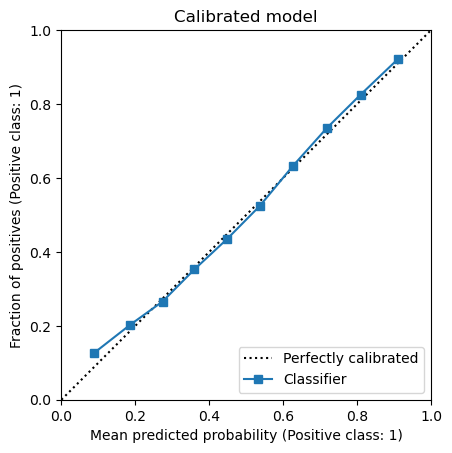

In [4]:
from sklearn.calibration import CalibrationDisplay

params = {"n_bins": 10, "strategy": "quantile"}
disp = CalibrationDisplay.from_predictions(y_true, y_proba, **params)
_ = disp.ax_.set(
    title="Calibrated model",
    xlim=(0, 1),
    ylim=(0, 1),
    aspect="equal",
)


We observe that the calibration curve is close to the diagonal that represents a
perfectly calibrated model. It means that relying on the predicted probabilities
will provide reliable estimates of the true probabilities.

For further analysis, we also compute the ROC AUC score of the model. It recall that
this metric is only based on the ranking of the predicted probabilities.

In [5]:
from sklearn.metrics import roc_auc_score

print(f"ROC AUC: {roc_auc_score(y_true, y_proba):.2f}")

ROC AUC: 0.80



So in addition of being well calibrated, our model is capable of distinguishing
between the two classes.

We now repeat the same analysis for the other sets of predictions.

ROC AUC: 0.80


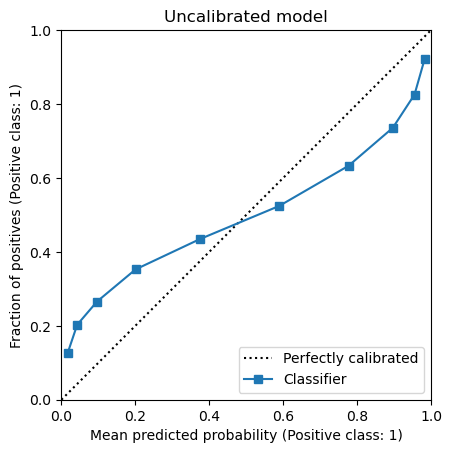

In [6]:
y_proba = np.load("../predictions/y_prob_2.npy")
disp = CalibrationDisplay.from_predictions(y_true, y_proba, **params)
_ = disp.ax_.set(
    title="Uncalibrated model",
    xlim=(0, 1),
    ylim=(0, 1),
    aspect="equal",
)
print(f"ROC AUC: {roc_auc_score(y_true, y_proba):.2f}")


We see that the ROC AUC score is the same. It means that whatever transformation we
apply to the predicted probabilities, it did not change the ranking of the
predictions. However, the calibration curve is not following the diagonal anymore.

Let's slightly modify the graphical representation to better interpret the results.

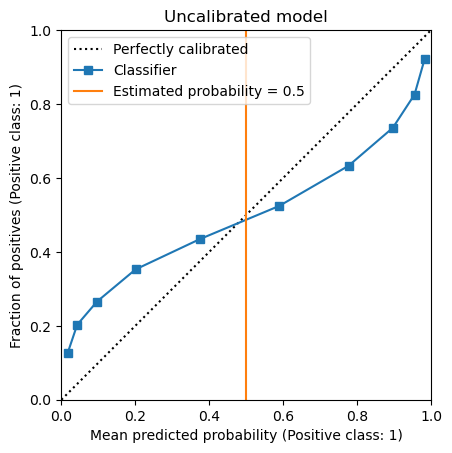

In [7]:
disp = CalibrationDisplay.from_predictions(y_true, y_proba, **params)
disp.ax_.axvline(0.5, color="tab:orange", label="Estimated probability = 0.5")
disp.ax_.legend()
_ = disp.ax_.set(
    title="Uncalibrated model",
    xlim=(0, 1),
    ylim=(0, 1),
    aspect="equal",
)


We added a vertical line at a 0.5 threshold for the mean predicted probability. Let's
first focus on the left part of the curve. The calibration curve is above the diagonal
it means that the fraction of positive samples is higher than the predicted
probabilities. Therefore, our model is too conservative at predicting the positive
class and is therefore under-confident. On the right part of the curve, the
calibration curve is below the diagonal. It means that the fraction of positive
samples is lower than the predicted probabilities. Our model is therefore
over-confident.

Let's use the same approach to analyze some other typical calibration curves.

ROC AUC: 0.80


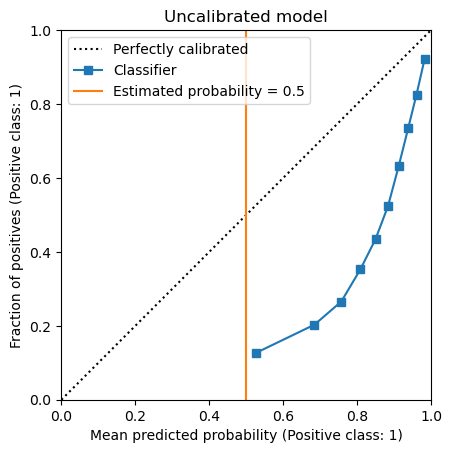

In [8]:
y_proba = np.load("../predictions/y_prob_3.npy")
disp = CalibrationDisplay.from_predictions(y_true, y_proba, **params)
disp.ax_.axvline(0.5, color="tab:orange", label="Estimated probability = 0.5")
disp.ax_.legend()
_ = disp.ax_.set(
    title="Uncalibrated model",
    xlim=(0, 1),
    ylim=(0, 1),
    aspect="equal",
)
print(f"ROC AUC: {roc_auc_score(y_true, y_proba):.2f}")


As in the previous case, we observe that the transformation applied does not change
the ranking of the predictions since we obtain the same ROC AUC score. However, we
have a completely different calibration curve that is not following the diagonal as
well.

First, we note that the curve does not span on the left side of the plot. It means
that our model never predicts probabilities lower than 0.5 even though there is
a small fraction of positive samples. On the right side of the curve, we are below
the diagonal meaning that our model is predicting higher probabilities estimates
than the fraction of positive samples. Our model is clearly over-confident.

Let's check the last set of predictions.

ROC AUC: 0.80


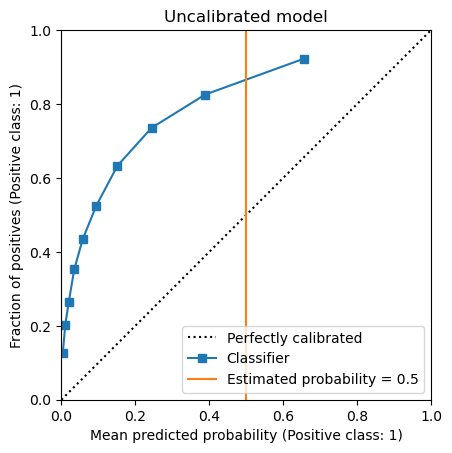

In [9]:
y_proba = np.load("../predictions/y_prob_4.npy")
disp = CalibrationDisplay.from_predictions(y_true, y_proba, **params)
disp.ax_.axvline(0.5, color="tab:orange", label="Estimated probability = 0.5")
disp.ax_.legend()
_ = disp.ax_.set(
    title="Uncalibrated model",
    xlim=(0, 1),
    ylim=(0, 1),
    aspect="equal",
)
print(f"ROC AUC: {roc_auc_score(y_true, y_proba):.2f}")


Here, we observe the opposite behaviour compared to the previous case: our model
output relatively low probabilities while the fraction of positive samples is high.
Therefore, this model is under-confident.